In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

# 1. BUSINESS UNDERSTANDING

In this project, i used Airbnb Seatle data and  focus on answering three business questions using exploratory data analysis, data visualization and machine learning algorithm. 

1- How are properties distributed among neighboorhood group? This  will help stakeholder to understand what percent of the properties are located in what neighboorhood of Seattle.

2 - What room types are most reviewed and rated in different neighboorhood?Is there a relationship room type price and number of review and review score rating? This will show if there is any relationship with reviews and room types

3-Implement one of ML algoritims which is linear regression model to forecast price. This will help stakeholder to predict price based on independt predictors.






# 2. DATA UNDERSTANDING

In [2]:
#In this project, i will be using Seattle Airbnb dataset
#Load Seattle listing data
df_listings = pd.read_csv('./Project_Udacity_files/listings.csv')

In [3]:
# Check the structure of the data after it's loaded.
df_listings.shape

(3818, 92)

In [4]:
#Checking if there is abnormal among the numberical columns. lincence does not have any data so it can be dropped
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354321,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
#Checking the data type of each column and be sure if there is any string column is required to be float value.
# host response rate and price which will be used in the following analysis are supposed to be float 
df_listings.dtypes

id                                    int64
listing_url                          object
scrape_id                           float64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

# 3 . DATA PREPARATION: CLEANING DATASET

In [6]:
#Redundant columns are dropped. They will not be used in the following data analysis process.

df_listings.drop(['security_deposit','weekly_price','summary','square_feet','monthly_price','space','scrape_id','notes','neighborhood_overview','transit','last_scraped','experiences_offered','thumbnail_url','medium_url','picture_url','xl_picture_url',
                 'host_id','host_thumbnail_url','host_picture_url','host_has_profile_pic','host_identity_verified',
                 'license','square_feet','cleaning_fee'],axis =1,inplace = True)


In [7]:
#There was formating issue in these two columns. Converting string column to float values 
df_listings['host_response_rate'] = df_listings['host_response_rate'].apply(lambda x : float(x.strip('%'))/100 if pd.notna(x)==True else None)
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)

host_about                     0.224987
host_acceptance_rate           0.202462
review_scores_checkin          0.172342
review_scores_accuracy         0.172342
review_scores_value            0.171818
review_scores_location         0.171556
review_scores_cleanliness      0.171032
review_scores_communication    0.170508
review_scores_rating           0.169460
reviews_per_month              0.164222
dtype: float64

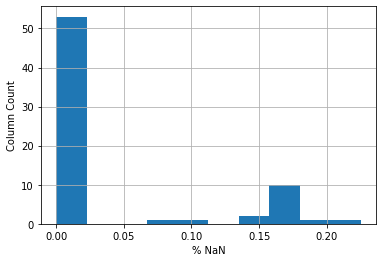

In [8]:
nan_cols = (df_listings.isnull().sum()/df_listings.shape[0]).sort_values(ascending = False)
ax = nan_cols.hist()  
ax.set_xlabel("% NaN")
ax.set_ylabel("Column Count")
nan_cols.head(n=10)

In [9]:

def clean_data_replace(df):
    
    '''
    BU SADECE ORNEK AYNI BU ORNEK GIBI UPDATE ETMEN LACIAMFPMAS;GV;FN'G'PDS
     INPUT:
    df - pandas dataframe which is df_listings
    
    OUTPUT:
    df - returns the clean data 
    df - return the data without no missing values
    '''

    for col in df:
        dt = df[col].dtype
        if dt == int or dt==float :
            df[col].fillna(df[col].mean(),inplace = True)
        else:
            df_listings[col].fillna(df[col].mode()[0],inplace=True)#Yani bundan pek emin degilim. boslukla da doldurulabilr.
            
    return df.columns[df.isnull().sum()>0]

In [10]:
clean_data_replace(df_listings)

Index([], dtype='object')

# 4.EXPLORATORY DATA ANALYSIS

# Q1 : How are properties distributed among neighboorhood group?

In this question, we would like to figure out how the properties are distributed among the neighboorhood. So, this will help us to figure out which neighboorhood has most properties. 

In [11]:
nb_seattle = (df_listings['neighbourhood_cleansed'].value_counts()).sort_values().reset_index()
nb_seattle

,index,neighbourhood_cleansed
0,Roxhill,2
1,South Park,3
2,Pinehurst,4
3,South Beacon Hill,4
4,Arbor Heights,5
...,...,...
82,Minor,135
83,Fremont,158
84,Wallingford,167
85,Belltown,234


In [12]:
nb_seattle_percent = (df_listings['neighbourhood_cleansed'].value_counts()/df_listings.shape[0]).sort_values(ascending = False).reset_index().head()
nb_seattle_percent

,index,neighbourhood_cleansed
0,Broadway,0.103981
1,Belltown,0.061289
2,Wallingford,0.043740
3,Fremont,0.041383
4,Minor,0.035359


<Figure size 1440x576 with 0 Axes>

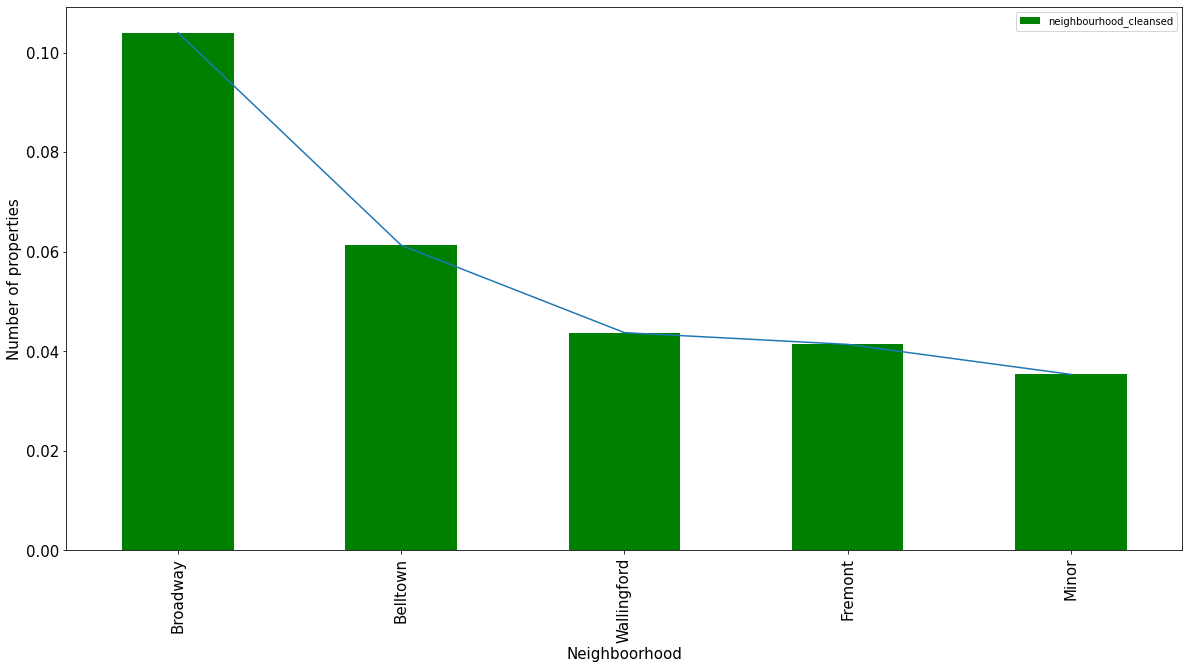

In [13]:
plt.figure(figsize = (20,8));
x = nb_seattle_percent['index'];
y = nb_seattle_percent['neighbourhood_cleansed'];
nb_seattle_percent.plot(x = 'index',y = 'neighbourhood_cleansed',kind = 'bar',figsize = (20,10),color='green');
plt.plot(x,y);
plt.xlabel('Neighboorhood',fontsize = 15);
plt.ylabel('Number of properties',fontsize = 15);
plt.tick_params(axis='x',  labelsize=15);
plt.tick_params(axis='y',  labelsize=15);

As easily seen it the graph below, Broadway has the most airbnb property in Seattle. There is a huge supply in Broadway relatively other neighboorhood

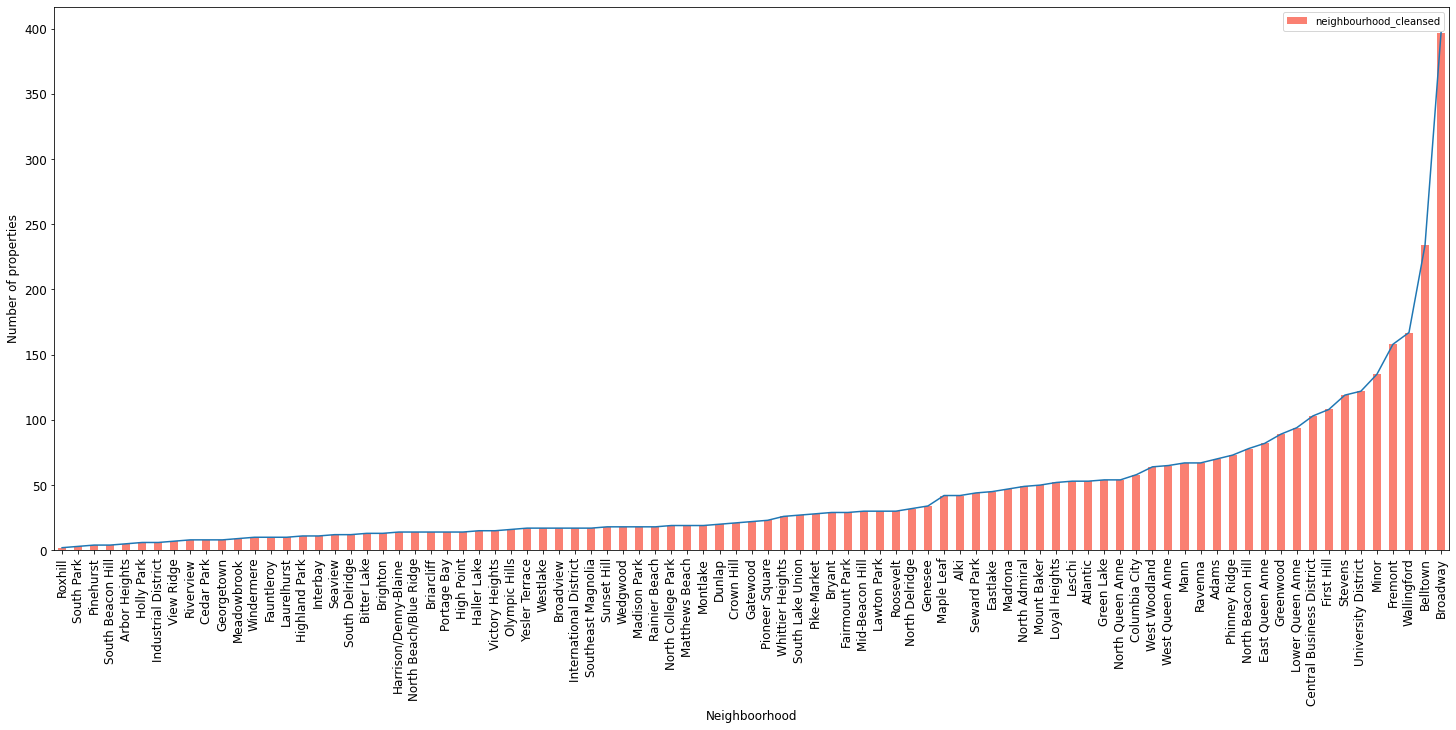

In [14]:

nb_seattle.plot(x = 'index',y = 'neighbourhood_cleansed',kind = 'bar',figsize = (25,10),color='salmon')
plt.plot(nb_seattle['index'],nb_seattle['neighbourhood_cleansed']);
plt.xlabel('Neighboorhood',fontsize = 12)
plt.ylabel('Number of properties',fontsize = 12);
plt.tick_params(axis='x',  labelsize=12)
plt.tick_params(axis='y',  labelsize=12)

# Q2: How many times room types are reviewed? What is the average review score rating? Is there a relationship room type price and number of review and review score rating?

We will try to figure out most prefered room types based on number of review and review score rating. Other important point to understand if there is any relationship between room type price and review rating. We will question if price and reviews are correlated.

In [15]:
#Here we selected specific columns that we will use in our explotory analysis.
df_Seatle_price_dist = df_listings[['room_type','property_type','neighbourhood_group_cleansed','neighbourhood_cleansed','price','number_of_reviews','review_scores_rating']]

In [16]:
df_Seatle_price_dist.sort_values(by = ['review_scores_rating','number_of_reviews'])

,room_type,property_type,neighbourhood_group_cleansed,neighbourhood_cleansed,price,number_of_reviews,review_scores_rating
1222,Entire home/apt,Apartment,Downtown,Belltown,130.0,1,20.0
1162,Private room,Apartment,Cascade,South Lake Union,75.0,1,40.0
2320,Entire home/apt,House,Rainier Valley,Mount Baker,81.0,1,40.0
3148,Entire home/apt,Apartment,Queen Anne,Lower Queen Anne,110.0,2,40.0
1666,Entire home/apt,Apartment,Downtown,First Hill,105.0,3,40.0
...,...,...,...,...,...,...,...
3715,Private room,House,Other neighborhoods,Fremont,70.0,76,100.0
2619,Entire home/apt,House,Capitol Hill,Broadway,99.0,77,100.0
2107,Entire home/apt,House,Beacon Hill,North Beacon Hill,99.0,100,100.0
3581,Entire home/apt,House,Capitol Hill,Stevens,120.0,182,100.0


In [17]:
#Most reviewed room type is entire home/apt
df_Seatle_price_dist.groupby(['room_type'])['number_of_reviews'].sum().reset_index()

,room_type,number_of_reviews
0,Entire home/apt,52465
1,Private room,30870
2,Shared room,1514


In [18]:
#Score of the Entire home/apt and private room are almost same. Generally scores of the room types are almost same. 
df_Seatle_price_dist.groupby(['room_type'])['review_scores_rating'].mean().reset_index()

,room_type,review_scores_rating
0,Entire home/apt,94.487734
1,Private room,94.756110
2,Shared room,93.508389


Most reviewed neighboorhood group are Other neighborhood, Downtown and Capital Hill . In these neighboorhood , entire home/apt is received
high number of reviews.

In [19]:
df_Seatle_price_dist.groupby(['neighbourhood_group_cleansed','room_type'])['number_of_reviews'].sum().sort_values(ascending=False).reset_index().head(5)


,neighbourhood_group_cleansed,room_type,number_of_reviews
0,Other neighborhoods,Entire home/apt,9984
1,Downtown,Entire home/apt,9698
2,Capitol Hill,Entire home/apt,7222
3,Other neighborhoods,Private room,7020
4,Queen Anne,Entire home/apt,4946


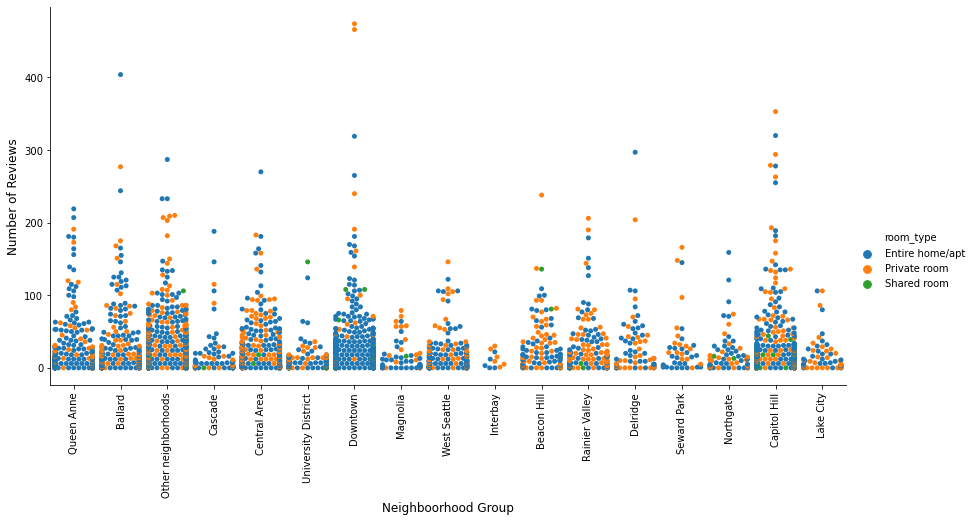

In [20]:
sns.catplot(x = 'neighbourhood_group_cleansed',y = 'number_of_reviews',hue = 'room_type',data =df_Seatle_price_dist, 
            kind = 'swarm',height=6, aspect=2 );
plt.xticks(rotation=90);
plt.xlabel('Neighboorhood Group',fontsize = 12);
plt.ylabel('Number of Reviews',fontsize = 12);


Lets take a look at if there is any correlation between price and number of reviews and review_score_rating given chart below.
It looks there is inverse correlation between price and number of reviews while there is direct relationship between price and review score rating but we cant say it is strong enough.

In [21]:
df_Seatle_price_dist.corr()

,price,number_of_reviews,review_scores_rating
price,1.000000,-0.124695,0.050488
number_of_reviews,-0.124695,1.000000,0.034939
review_scores_rating,0.050488,0.034939,1.000000


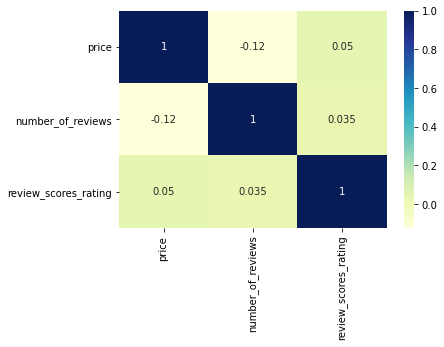

In [22]:
sns.heatmap(df_Seatle_price_dist.corr(),cmap="YlGnBu",annot = True)

C:\Users\hilal\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


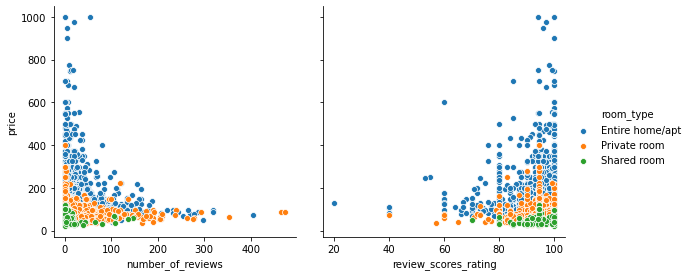

In [23]:
sns.pairplot(df_Seatle_price_dist,x_vars=['number_of_reviews','review_scores_rating'],y_vars=['price'],hue='room_type',size = 4);

Given dataframe below shows how the price are distributed between room type in the different neighboorhood group. As seen in the graph to Magnolia is the most expensive neighboorhood if entire room/apt is rented.

In [24]:
df_Seatle_price_dist.groupby(['neighbourhood_group_cleansed','room_type'])['price'].mean().sort_values(ascending = False).reset_index().head()

,neighbourhood_group_cleansed,room_type,price
0,Magnolia,Entire home/apt,232.390244
1,Queen Anne,Entire home/apt,175.510823
2,West Seattle,Entire home/apt,170.177778
3,Downtown,Entire home/apt,162.834395
4,Cascade,Entire home/apt,162.354839


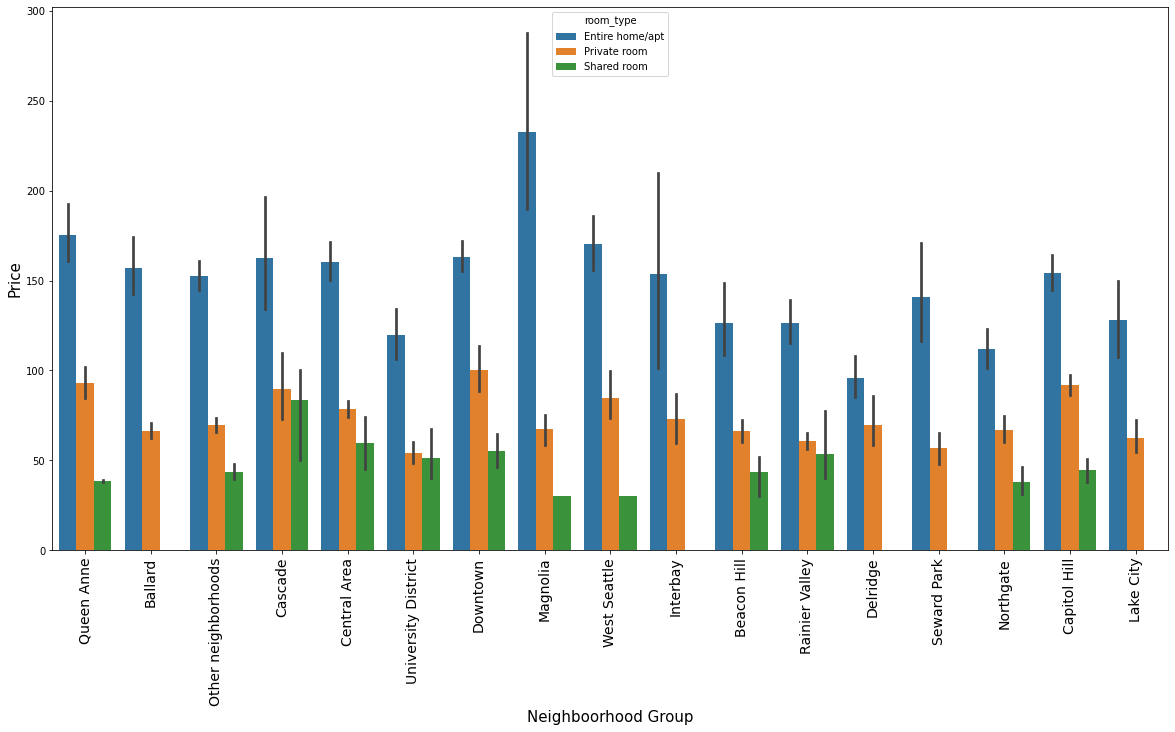

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x = "neighbourhood_group_cleansed", y = "price", hue = "room_type", data = df_Seatle_price_dist)
plt.xticks(rotation=90,fontsize = 14);
plt.xlabel('Neighboorhood Group',fontsize = 15);
plt.ylabel('Price',fontsize = 15);
plt.show()

# 5. DATA MODELING AND EVALUATION

   # Q3 : Implement linear regression model to apply ML algorithm to forecast price based on variables are selected.

We performed a ML model to forecast if price are impacted under different circumstances. In order to proceed , we selected columns as indipendent variables. Dependent variable is here price. The list of independent variables are below.

SELECTED INDEPENDENT VARIABLES :::
host_response_time,
host_response_rate,
property_type,
room_type,
accommodates,
bathrooms,
bedrooms,
beds,
bed_type,
minimum_nights,
maximum_nights,
availability_365,
number_of_reviews,
review_scores_rating,
review_scores_accuracy,
review_scores_cleanliness,
review_scores_checkin,
review_scores_communication,
review_scores_location,
review_scores_value,
instant_bookable,
cancellation_policy,
require_guest_profile_picture,
require_guest_phone_verification,
calculated_host_listings_count,
reviews_per_month,
neighbourhood_cleansed

DEPENDENT VARIABLE :::
price

In [26]:
#Useful colunms for ML application has been selected
df_selected_vars = df_listings[['host_response_time','host_response_rate','property_type','room_type','accommodates','bathrooms',
                              'bedrooms','beds','bed_type','minimum_nights','maximum_nights','availability_365','number_of_reviews',
                               'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','neighbourhood_cleansed',
                                'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable',
                               'cancellation_policy','require_guest_profile_picture','require_guest_phone_verification',
                                'calculated_host_listings_count','reviews_per_month','price']]

In [27]:
df_selected_vars.head()

,host_response_time,host_response_rate,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price
0,within a few hours,0.960000,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,1,...,10.000000,9.000000,10.000000,f,moderate,f,f,2,4.070000,85.0
1,within an hour,0.980000,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,...,10.000000,10.000000,10.000000,f,strict,t,t,6,1.480000,150.0
2,within a few hours,0.670000,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,4,...,10.000000,10.000000,10.000000,f,strict,f,f,2,1.150000,975.0
3,within an hour,0.948868,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,1,...,9.809599,9.608916,9.452245,f,flexible,f,f,1,2.078919,100.0
4,within an hour,1.000000,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,1,...,10.000000,9.000000,9.000000,f,strict,f,f,1,0.890000,450.0


In this part of the modeling, we created Dummy variables. Right after that,dummy variables are merged with numerical columns.

In [28]:
#CREATE DUMMY VARIABLES
cat_df = df_selected_vars.select_dtypes(include=['object'])
cat_df_copy = cat_df.copy()
cat_cols_lst = cat_df.columns

def create_dummy_df(df,cat_cols):
    
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for var in cat_cols:
        try:
            df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
        except:
            continue
    return df

In [29]:

#Pull a list of the column names of the categorical variables
cat_df = df_selected_vars.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

df_new = create_dummy_df(df_selected_vars, cat_df) #Use your newly created function

# Show a header of df_new to check

df_new.head()



,host_response_rate,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,...,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t
0,0.960000,4,1.0,1.0,1.0,1,365,346,207,95.000000,...,0,0,0,0,0,0,1,0,0,0
1,0.980000,4,1.0,1.0,1.0,2,90,291,43,96.000000,...,0,0,0,0,0,0,0,1,1,1
2,0.670000,11,4.5,5.0,7.0,4,30,220,20,97.000000,...,0,0,0,0,0,0,0,1,0,0
3,0.948868,3,1.0,0.0,2.0,1,1125,143,0,94.539262,...,0,0,0,0,0,0,0,0,0,0
4,1.000000,6,2.0,3.0,3.0,1,1125,365,38,92.000000,...,0,0,0,0,0,0,0,1,0,0


In [30]:
def fit_linear_mod(df,response_col,test_size=.3, rand_state=42):
    
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    

    '''
    #Split your data into an X matrix and a response vector y
    X = df.drop(response_col,axis =1)
    y = df[response_col]
    
    #Create training and test set of data
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_size, random_state = rand_state)
    
    #Instantiate a Linear Regression model with normalized data
    lm_model = LinearRegression(normalize = True)
    
    #Fit your model to thre training data
    lm_model.fit(X_train,y_train)
    
    #Predict the response for the training data and the test data
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)
    
    #Obtain an rsquared value for both the training and test data
    test_score = r2_score(y_test,y_test_preds)
    train_score = r2_score(y_train,y_train_preds)
    
    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test,y_test_preds,y_train_preds
    
    
    

#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test,y_test_preds,y_train_preds = fit_linear_mod(df_new, 'price')
    


Our linear regression model explains around 60% of the variation of pricing in the training set, and 60% of variation of pricing in test set

In [31]:
#Print training and testing score . R square measures the strength of the relationship between mode and dependent variables 
#Our model is fitted 60% our observations.
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.5973214647874412.  The rsquared on the test data was 0.5992518123850483.


In [32]:
lm_model.intercept_

-50.168152159669646

Text(0, 0.5, 'predicted_price')

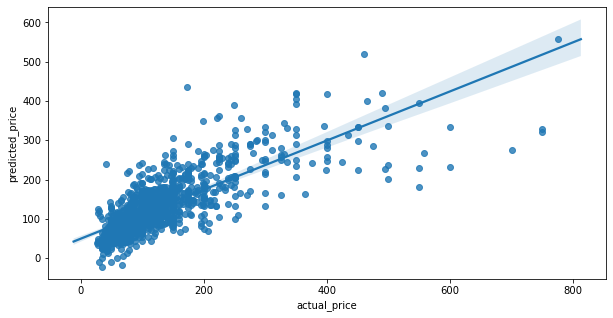

In [33]:
#plotting y_test, y_test_prediction
plt.figure(figsize=(10,5))
sns.regplot(y_test,y_test_preds)
plt.xlabel('actual_price')
plt.ylabel('predicted_price')

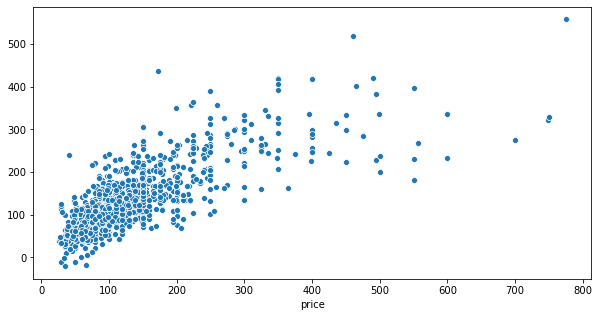

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(y_test, y_test_preds)

We also look at p-values and coefficients of the model. if pvalues is less than 0.05 for each independent variable,there is a correlation between  X vars and Y var. For example, p-value of 'accommodates','bathrooms','bedrooms','reviews_per_month' less than 0.05, we can say change in in the independent variables are associated with price. This variable is statistically significant and probably a worthwhile addition to your regression model.  Otherwise, it is accepted that there is no significant relationship  between X and y variables. 

The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable the dependent variable. For example, while ‘accommodates’,’bathrooms’,’bedrooms’,’beds’ have positive correlation with price, ‘number of review’,’review score checkin’ has negative correlation. 


In [35]:
import statsmodels.api as sm

X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     28.53
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        06:47:20   Log-Likelihood:                -14577.
No. Observations:                2672   AIC:                         2.942e+04
Df Residuals:                    2539   BIC:                         3.020e+04
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

C:\Users\hilal\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
